In [1]:
# Import the table of HPIX

import pandas as pd

Ast = pd.read_csv("/hildafs/projects/phy220048p/leihu/JupyterSPACE/transfer_box/COSWEB-1727-NIRCAM_HEALPIX_INDEX-19.csv")

In [2]:
# Compile sets of HPIX into an array of exposures

import numpy as np 
sets = []
for i in range(203):
    sets.append(Ast['HEALPIX_INDEX'][Ast['FILE_INDEX'] == i])
print(len(sets))

203


In [16]:
# Calculates # of HPIX in overlap (not used much)
def calculate_overlap_hpix(image1, image2):
    return len(image1[np.in1d(image1, image2)])

# Extraneous function, not used:
# def average_overlap_loss(data_used):
#     if len(data_used) < 2:
#         return 0.0 

#     total_overlap = 0.0
#     num_pairs = len(data_used) - 1

#     for i in range(num_pairs):
#         overlap = calculate_overlap_hpix(data_used[i], data_used[i + 1])
#         total_overlap += overlap

#     average_overlap = total_overlap / num_pairs
#     return average_overlap


In [19]:
# Greedy algorithm:

def greedy_exposure_selection(images):
    data_used = []
    ratios = []
    
    # To print to keep track of progress
    index = 0
    
    while len(images) > 1:
        print(index)
        
        # Establish variables
        max_overlap = -1
        max_image_index = None
        
        # Merge every exposure in data_used without duplicates
        merged = []
        for j in data_used: 
            merged.extend(j)
        merged = list(set(merged))
        
        # Check every exposure left in images against merged for overlap
        for i in range(len(images)):
            
            overlap = len(images[i][np.in1d(images[i],merged)]) 

            # Set maximum overlap
            if overlap > max_overlap:
                max_overlap = overlap
                max_image_index = i
            
        # Add most overlapped image to array
        data_used.append(images[max_image_index])
        ratio = len(images[max_image_index][np.in1d(images[max_image_index], merged)])/len(images[max_image_index])
        ratios.append(ratio)
        
        # Remove added image from array
        images[max_image_index], images[-1] = images[-1], images[max_image_index]
        images.pop()
        index += 1
        
    # Complete for last image
    merged = []
    for j in data_used: 
        merged.extend(j)
    merged = list(set(merged))
    data_used.append(images[0])
    ratio = len(images[0][np.in1d(images[0], merged)])/len(images[0])
    ratios.append(ratio)
    
    return data_used, ratios

# Testing algorithm example

ordered_images, ratios = greedy_exposure_selection(sets.copy())

print("Done")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
Done


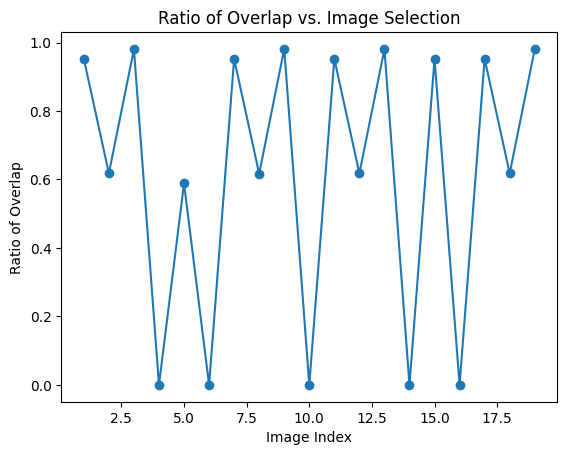

In [20]:
# Function to get an array of accumulating ratio of overlap per exposure

def get_ratios(data):
    ratios = []
    for i in range(len(data)):
        if i == 0:
            ratios.append(0.0)
        else:
            healpix_merged = []
            healpix_exp_selected = data[i]

            for healpix_exp in data[:i]:
                healpix_merged.extend(healpix_exp)

            healpix_merged = list(set(healpix_merged))

            ratio = len(healpix_exp_selected[np.in1d(healpix_exp_selected, healpix_merged)])/len(healpix_exp_selected)
            ratios.append(ratio)
    return ratios
        
# Convert ordered_images to indices for plotting
ordered_image_ids = list(range(len(ordered_images)))

# Plot the ordered images against loss values
plt.plot(ordered_image_ids[1:], ratios[1:], marker='o') # Ignores first value (0.0)
plt.xlabel('Image Index')
plt.ylabel('Ratio of Overlap')
plt.title('Ratio of Overlap vs. Image Selection')
plt.show()

In [21]:
# Random functions, not relevant

# for i in range(len(ordered_images)):
#     min_overlap = 1
#     curr_overlap = []
#     for j in range(i):
#         curr_overlap = list(set(curr_overlap) | set(ordered_images[i][np.in1d(ordered_images[i],ordered_images[j])]))
#         if (len(curr_overlap)/len(ordered_images[i])) < min_overlap:
#             min_overlap = len(curr_overlap)/len(ordered_images[i])
#     print(min_overlap)

# loss_percentages = []

# for i in range(len(ordered_images)):
#     loss_percentages.append(loss_values[i]/len(ordered_images[i]))
    
# print(loss_percentages)

In [36]:
# Print all possible ratios of permutations of size, compare against greedy

import itertools
import matplotlib.pyplot as plt

# Code to make legend more readable:

# fig = plt.figure()
# ax = plt.subplot(111)

size = 10

subset = sets[10:14]

permutations = list(itertools.permutations(subset))

ordered_ratios = []

for s in permutations:
    ordered_ratios.append(min(get_ratios(s)[1:]))
    print(min(get_ratios(s)[1:])
    
ordered_ratios.sort()
print(ordered_ratios)

    
image_list_1014, ratio_1014 = greedy_image_selection(sets.copy()[10:14])
print("Greedy ratio: " + str(min(ratio_1014[1:])))


# Code to make legend more readable: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

[0.5883156915202977, 0.5883156915202977, 0.5883213942983434, 0.5883213942983434, 0.5886378396192581, 0.5886378396192581, 0.5886834885952753, 0.5886834885952753, 0.6157686081789719, 0.6157686081789719, 0.6157730969436717, 0.6157730969436717, 0.615786514675662, 0.615786514675662, 0.6157969736038542, 0.6157969736038542, 0.616170526254568, 0.616170526254568, 0.6166991382903447, 0.6166991382903447, 0.6177551158890644, 0.6177551158890644, 0.6179384281338451, 0.6179384281338451]
0
1
2
Greedy ratio: 0.6166991382903447
